<a href="https://colab.research.google.com/github/nursyazwanaa/DL/blob/main/Deep_Learning_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving apple_datas.csv to apple_datas (1).csv


{'apple_datas (1).csv': b'Date,Close,High,Low,Open,Volume\r\n24/4/2020,68.67086792,68.68057715,67.22207418,67.27061294,126161200\r\n27/4/2020,68.71942902,69.05189813,67.93800219,68.3869525,117087600\r\n28/4/2020,67.60551453,69.36493733,67.51330272,69.18292807,112004800\r\n29/4/2020,69.82603455,70.29683242,68.89414803,69.09799751,137280800\r\n30/4/2020,71.29909515,71.47625351,69.9764989,70.36720858,183064000\r\n1/5/2020,70.15122986,72.56103088,69.36980308,69.46687321,240616800\r\n4/5/2020,71.14378357,71.27240316,69.48385993,70.17549663,133568000\r\n5/5/2020,72.21157837,73.0463949,71.45927182,71.60488074,147751200\r\n6/5/2020,72.95658875,73.58997738,72.52947134,72.91533006,142333600\r\n7/5/2020,73.71131134,74.05834791,73.28177221,73.58512094,115215200\r\n8/5/2020,75.46577454,75.51930874,74.04469357,74.37319857,133838400\r\n11/5/2020,76.65326691,77.14966694,74.76254165,74.97181445,145946400\r\n12/5/2020,75.7772522,77.79207365,75.65558422,77.3394649,162301200\r\n13/5/2020,74.86230469,76.88

<ipython-input-51-4651defe9266>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dates = pandas.to_datetime(dataframe["Date"])
<ipython-input-51-4651defe9266>:18: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  pyplot.plot_date(dates,


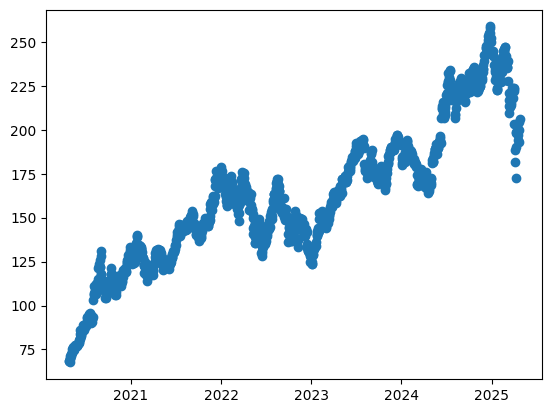

In [ ]:
import pandas

dataframe = pandas.read_csv("apple_datas.csv")

stock_open_value = dataframe.iloc[:,1:2] #integer location=select column

training_values = stock_open_value[:960].values

testing_values = stock_open_value[960:].values

training_values.shape
testing_values.shape

dates = pandas.to_datetime(dataframe["Date"])

import matplotlib.pyplot as pyplot

pyplot.plot_date(dates,
                 stock_open_value)


In [ ]:
#Scaling Data
#scaling data help you to work ur coding much faster when u train with machine learning model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_values_scaled = scaler.fit_transform(training_values) #use scaler function to traininf_values as argument
#use numpy for faster compute array than regular array

X_train = []
y_train = []

for index in range(50, 960): #use spesific range for training
  X_train.append(training_values_scaled[index-50:index, 0])
  y_train.append(training_values_scaled[index, 0])


import numpy
X_train = numpy.array(X_train) #transform xtarin array into a numpy array
y_train = numpy.array(y_train)

X_train.shape
X_train=numpy.reshape(X_train,
              (X_train.shape[0],
              X_train.shape[1],
              1)) #reshape the data. 2 arguments (what u want to reshape, how u want to reshape)

X_train.shape
y_train.shape

(910,)

In [ ]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense #output layers

sequential = Sequential()

sequential.add(LSTM(units = 20,
                    return_sequences = True,
                    input_shape = (X_train.shape[1],
                                   1)))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 20,
                    return_sequences = True))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 20,
                    return_sequences = True))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 20,
                    return_sequences = True))

sequential.add(Dense(units = 1))

sequential.compile(optimizer = "adam", #diff model suits diff optimizer, need to trynerror
                   loss = "mean_squared_error")

sequential.fit(X_train, y_train,
               epochs     = 18,
               batch_size = 1,
               verbose    = 2)
#several iteration of data, minimal it to minimize the error to get better, to avoid overfed, too precise
#loss is error, decreasing value indicate lesser error for each iteration but doesnt always mean good

Epoch 1/18


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


910/910 - 13s - 14ms/step - loss: 0.0305
Epoch 2/18
910/910 - 10s - 11ms/step - loss: 0.0138
Epoch 3/18
910/910 - 10s - 11ms/step - loss: 0.0115
Epoch 4/18
910/910 - 9s - 10ms/step - loss: 0.0104
Epoch 5/18
910/910 - 10s - 11ms/step - loss: 0.0100
Epoch 6/18
910/910 - 10s - 11ms/step - loss: 0.0097
Epoch 7/18
910/910 - 10s - 11ms/step - loss: 0.0094
Epoch 8/18
910/910 - 10s - 11ms/step - loss: 0.0090
Epoch 9/18
910/910 - 10s - 11ms/step - loss: 0.0089
Epoch 10/18
910/910 - 10s - 11ms/step - loss: 0.0089
Epoch 11/18
910/910 - 10s - 11ms/step - loss: 0.0087
Epoch 12/18
910/910 - 10s - 11ms/step - loss: 0.0087
Epoch 13/18
910/910 - 10s - 11ms/step - loss: 0.0087
Epoch 14/18
910/910 - 10s - 11ms/step - loss: 0.0085
Epoch 15/18
910/910 - 10s - 11ms/step - loss: 0.0084
Epoch 16/18
910/910 - 10s - 11ms/step - loss: 0.0087
Epoch 17/18
910/910 - 11s - 12ms/step - loss: 0.0084
Epoch 18/18
910/910 - 20s - 22ms/step - loss: 0.0085


In [ ]:

testing_set = stock_open_value[len(stock_open_value)-len(testing_values)-349:].values
#to get a very last value - length of testing value .to go to the very end value of the array. to get all the values
#store final value
testing_set.shape

#scale the set we use ealier
testing_set = scaler.transform(testing_set)

#reshape into numpy array bcs its much faster when hv large data than a regular array
x_test = []
for index in range(20, 349):
  x_test.append(testing_set[index-20:index,0])

x_test = numpy.array(x_test)
x_test.shape

x_test = numpy.reshape(x_test,
                       (x_test.shape[0],
                       x_test.shape[1],
                       1)) #[0]=299 , [1]=1 #must do this to avoid more spread and error

x_test.shape

(329, 20, 1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


Text(0.5, 1.0, 'Stock Prediction vs Actual Price')

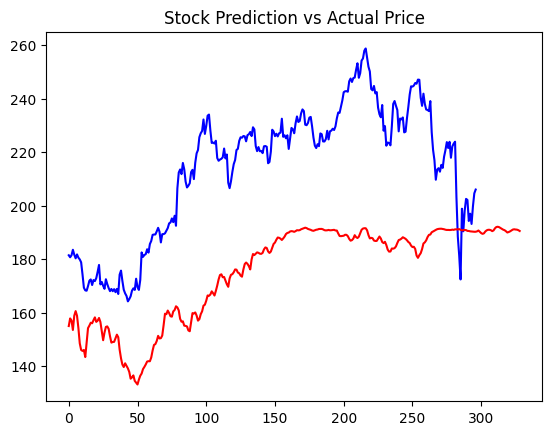

In [ ]:
#functionality to test our model
model_prediction = sequential.predict(x_test) #sequential is our model in the x_test

# Reshape model_prediction back to its original shape for plotting
model_prediction = model_prediction[:, -1, :] # Get the last prediction in each sequence

model_prediction = scaler.inverse_transform(model_prediction)
#to transform our model prediction with our scalar

pyplot.plot(testing_values, color="blue")

pyplot.plot(model_prediction, color="red")

pyplot.title("Stock Prediction vs Actual Price")